In [36]:
import scipy as sp
import numpy as np
import qibo
from qibo.symbols import *
from qibo import hamiltonians
import matplotlib.pyplot as plt
from tqdm import tqdm

from functions import *

In [37]:
nqubits = 4

H_def = sum([ -Z(x)*Z(x+1) + X(x)*X(x+1)+ Y(x)*Y(x+1)  for x in range(nqubits-1)])
#H_def = sum([ Z(x)*Z(x+1) +X(x) for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))

#H = np.kron(H,np.eye(2**5))
eigs,vecs = np.linalg.eigh(H)

[Qibo 0.2.16|WARNING|2025-02-21 16:18:42]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


In [38]:
V = maxEntangledState(nqubits)
print(V)

[0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0

## ITE
$|\text{TFD}(\beta)\rangle = \frac{1}{\sqrt\mathcal{N}} e^{-\beta H/2} |\text{TFD}(0)\rangle$

In [39]:
beta = np.logspace(-5, 2, 10)
tfd = np.zeros((len(beta), 2**(2*nqubits)), dtype=complex)
for i in range(len(beta)):
    tfd[i] = TFD(beta[i], H, maxEntangledState(nqubits))

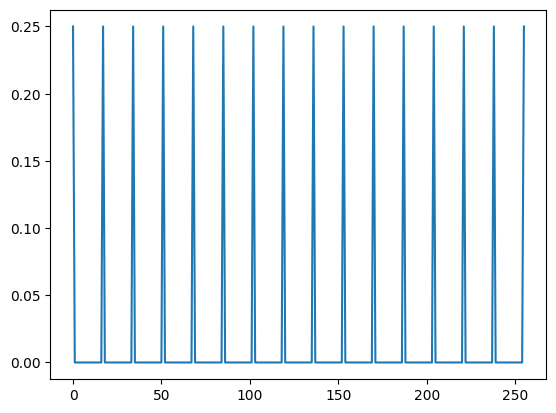

In [40]:
plt.figure()
plt.plot(np.abs(maxEntangledState(nqubits)))
         

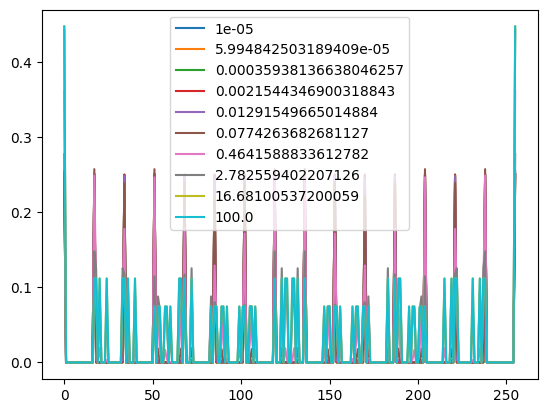

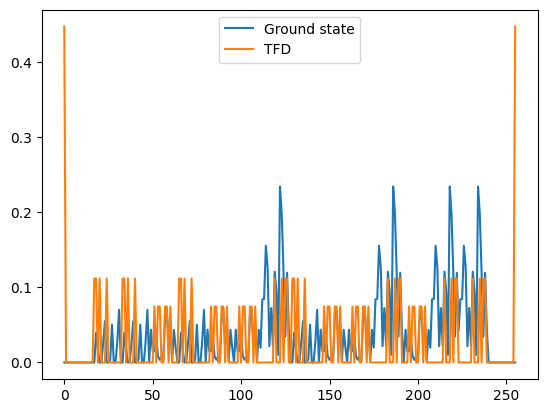

In [41]:
plt.figure()
for i in range(len(beta)):
    plt.plot(np.abs(tfd[i,:]), label=str(beta[i]))
plt.legend()

plt.figure()
plt.plot(np.abs(vecs.T[0]),label='Ground state')
plt.plot(np.abs(tfd[-1,:]), label='TFD')
plt.legend()
plt.show()


## Exact Commutator

$|\sigma_{k+1} \rangle = e^{-s_k [\sigma_k, H]}|\sigma_k \rangle$

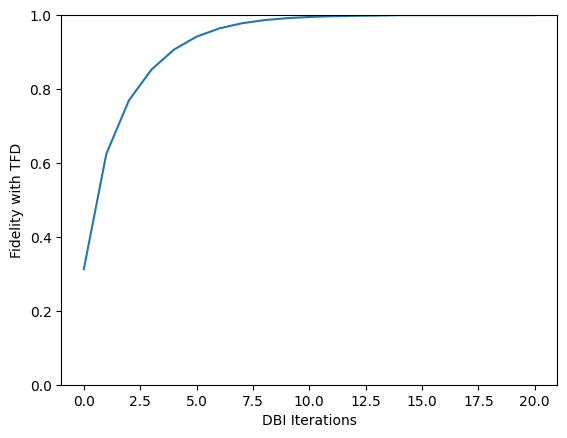

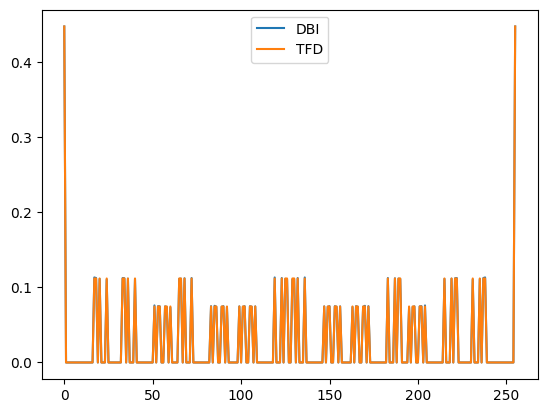

In [43]:
state = maxEntangledState(nqubits)
fidelity, state, steps = optimalDBI(H,state, tfd[-1,:])
iters = 20

plt.figure()
plt.plot(fidelity)
plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.show()


plt.figure()
plt.plot(np.abs(state),label='DBI')
plt.plot(np.abs(tfd[-1,:]), label='TFD')
plt.legend()
plt.show()



## Exact DB-QITE


$|\omega_{k+1} \rangle = e^{i\sqrt{s_k}H}e^{i\sqrt{s_k}\omega_k}e^{-i\sqrt{s_k}H}|\omega_k \rangle$

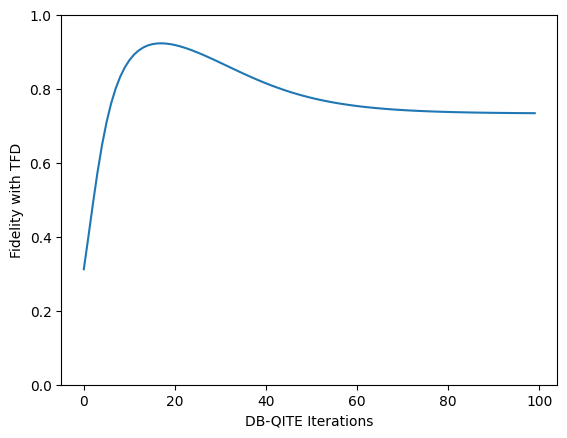

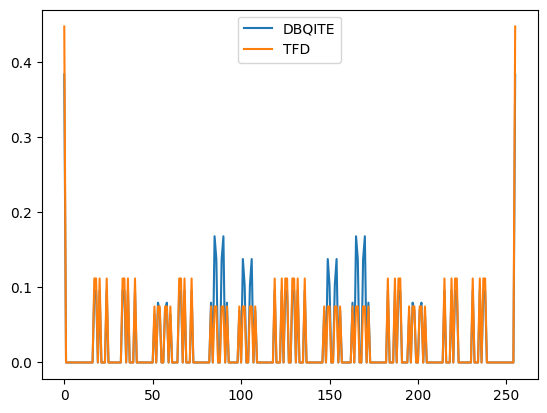

In [47]:
state = maxEntangledState(nqubits)
step = 0.1
iters = 100

newState = DBQITE(iters, H, step, state)

fidelity = np.zeros(iters)
for i in range(iters):
    fidelity[i] = np.abs(UJFidelity(tfd[-1,:], newState[i,:]))

plt.figure()
plt.plot(fidelity)
plt.xlabel('DB-QITE Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)

plt.figure()
plt.plot(np.abs(newState[-1,:]),label='DBQITE')
plt.plot(np.abs(tfd[-1,:]), label='TFD')
plt.legend()



c:\Users\andre\Desktop\EPFL\Master-Project\Master-Project\functions.py:148: ComplexWarning: Casting complex values to real discards the imaginary part
  steps[i] = s


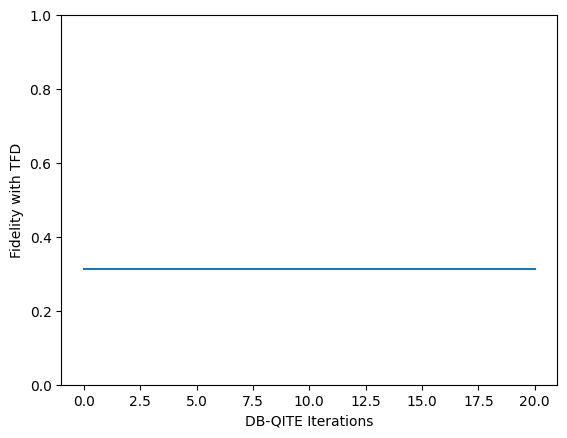

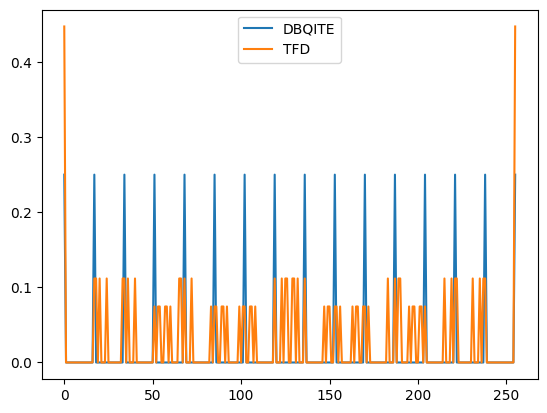

In [ ]:
state = maxEntangledState(nqubits)
fidelity, state, steps = optimalDBI(H, state, tfd[-1,:], "DBIQITE")

plt.figure()
plt.plot(fidelity)
plt.xlabel('DB-QITE Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.show()

plt.figure()
plt.plot(np.abs(state),label='DBQITE')
plt.plot(np.abs(tfd[-1,:]), label='TFD')
plt.legend()
plt.show()



## Comparison for different Hamiltonians and sizes

[Qibo 0.2.16|WARNING|2025-02-21 16:22:09]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
c:\Users\andre\Desktop\EPFL\Master-Project\Master-Project\functions.py:148: ComplexWarning: Casting complex values to real discards the imaginary part
  steps[i] = s
[Qibo 0.2.16|WARNING|2025-02-21 16:22:09]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


[Qibo 0.2.16|WARNING|2025-02-21 16:22:09]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-02-21 16:22:10]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


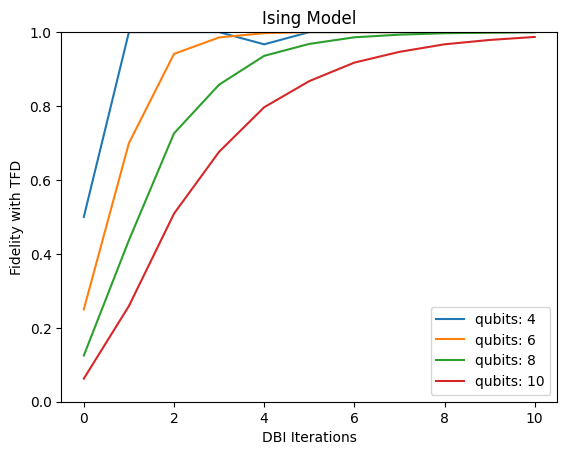

In [50]:
nqubits =[2,3,4,5]
plt.figure()
plt.title('Ising Model')
for i in range(len(nqubits)):
    H_def = sum([ -Z(x)*Z(x+1) + X(x)  for x in range(nqubits[i]-1)])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    H = np.kron(H,np.eye(2**nqubits[i]))
    initState = maxEntangledState(nqubits[i])
    refState = TFD(100, H, initState)
    fEnergy, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
    #fFidelity, state, stepsFidelity = optimalDBI(H, initState, refState, "DBI", "Fidelity")

    plt.plot(fEnergy, label = "qubits: " + str(2*nqubits[i]))
    #plt.plot(fFidelity, label='Fidelity '+str(nqubits[i]))

plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.legend()
plt.show()

[Qibo 0.2.16|WARNING|2025-02-21 16:22:18]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
c:\Users\andre\Desktop\EPFL\Master-Project\Master-Project\functions.py:114: RuntimeWarning: invalid value encountered in scalar divide
  return (val1+val2+val3)/V**(3/2)
c:\Users\andre\Desktop\EPFL\Master-Project\Master-Project\functions.py:122: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.arccos(1/(np.sqrt(1+0.25*S**2)))
c:\Users\andre\Desktop\EPFL\Master-Project\Master-Project\functions.py:50: RuntimeWarning: invalid value encountered in divide
  newState[i+1] = newState[i+1]/np.sqrt(np.conj(newState[i+1])@newState[i+1])
c:\Users\andre\Desktop\EPFL\Master-Project\Master-Project\functions.py:123: RuntimeWarning: invalid value encountered in scalar divide
  sOpt = (np.pi-2*alpha)/(4*np.sqrt(V))
[Qibo 0.2.16|WARNING|2025-02-21 16:22:18]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.

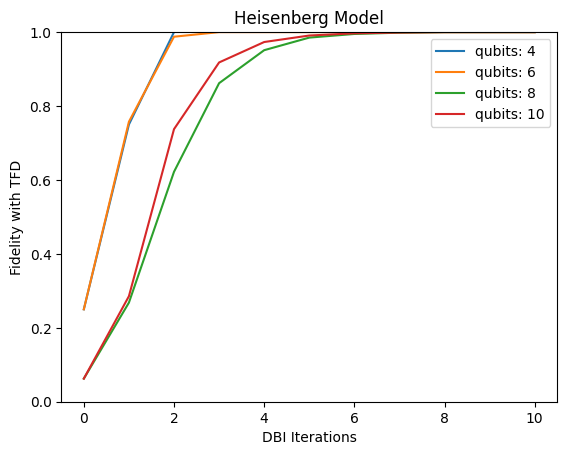

In [51]:
nqubits = [2, 3, 4, 5]
plt.figure()
plt.title('Heisenberg Model')
for i in range(len(nqubits)):
    H_def = sum([Z(x)*Z(x+1) + X(x)*X(x+1) + Y(x)*Y(x+1)  for x in range(nqubits[i]-1)])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    H = np.kron(H,np.eye(2**nqubits[i]))
    initState = maxEntangledState(nqubits[i])
    refState = TFD(10, H, initState)
    fEnergy, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
    #fFidelity, state, stepsFidelity = optimalDBI(H, initState, refState, "DBI", "Fidelity")

    plt.plot(fEnergy, label = "qubits: " + str(2*nqubits[i]))
    #plt.plot(fFidelity, label='Fidelity '+str(nqubits[i]))

plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.legend()
plt.show()

[Qibo 0.2.16|WARNING|2025-02-21 16:22:25]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-02-21 16:22:25]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-02-21 16:22:25]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-02-21 16:22:26]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


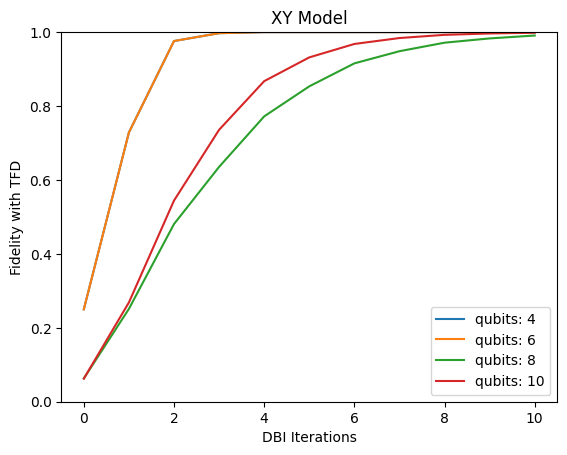

In [52]:
nqubits = [2, 3, 4, 5]
plt.figure()
plt.title('XY Model')
for i in range(len(nqubits)):
    H_def = sum([X(x)*X(x+1) + Y(x)*Y(x+1)  for x in range(nqubits[i]-1)])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    H = np.kron(H,np.eye(2**nqubits[i]))
    initState = maxEntangledState(nqubits[i])
    refState = TFD(10, H, initState)
    fEnergy, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
    #fFidelity, state, stepsFidelity = optimalDBI(H, initState, refState, "DBI", "Fidelity")

    plt.plot(fEnergy, label = "qubits: " + str(2*nqubits[i]))
    #plt.plot(fFidelity, label='Fidelity '+str(nqubits[i]))

plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.legend()
plt.show()

[Qibo 0.2.16|WARNING|2025-02-21 16:22:33]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-02-21 16:22:33]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


[Qibo 0.2.16|WARNING|2025-02-21 16:22:33]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-02-21 16:22:34]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


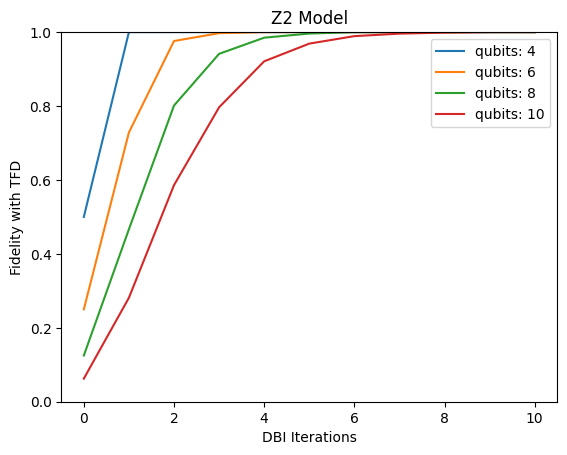

In [53]:
nqubits = [2, 3, 4, 5]
plt.figure()
plt.title('Z2 Model')
for i in range(len(nqubits)):
    H_def = sum([-Z(x)*Z(x+1)  for x in range(nqubits[i]-1)])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    H = np.kron(H,np.eye(2**nqubits[i]))
    initState = maxEntangledState(nqubits[i])
    refState = TFD(10, H, initState)
    fEnergy, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
    #fFidelity, state, stepsFidelity = optimalDBI(H, initState, refState, "DBI", "Fidelity")

    plt.plot(fEnergy, label = "qubits: " + str(2*nqubits[i]))
    #plt.plot(fFidelity, label='Fidelity '+str(nqubits[i]))

plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.legend()
plt.show()